In [2]:
import pandas as pd
import numpy as np
import re

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

# read data
data = pd.read_csv('.\data\\training\\mbti.csv') 
data.head(10)

,type,posts
0,ENFJ,'https://www.youtube.com/watch?v=PLAaiKvHvZs||...
1,ENFJ,https://www.youtube.com/watch?v=AwgF14ySLpw I...
2,ENFJ,'That sounds like a beautiful relationship alr...
3,ENFJ,'I've always thought of Tony Stark as more of ...
4,ENFJ,'ABILITY TO TRANSFORM. Form of... a bucket of...
5,ENFJ,It burns!! Haha|||http://personalitycafe.com/m...
6,ENFJ,'http://www.youtube.com/watch?v=3mokC24vTPI|||...
7,ENFJ,"'I had an ESTJ boss, who was a kinda control f..."
8,ENFJ,'ENFJ with a concussion: A Case Study. :dry: ...
9,ENFJ,"What arguments? There were none. You stated, b..."


In [3]:
[p.split('|||') for p in data.head(2).posts.values]

[["'https://www.youtube.com/watch?v=PLAaiKvHvZs",
  '51 :o',
  "I went through a break up some months ago. We were together for 4 years and I had planned my life around that relationship. I wasn't the one breaking the relationship as you might imagine and all our...",
  'ENFJ Puns so many puns.',
  "Well I personally don't go that much for attractiveness in general but I can see you have the will to change that and that's good already. May I ask if you want to be with them in a merely sexual...",
  "Sorry, not an INFP but I'm really into post-rock so I had to post :<  Going to leave this here and sneak out D:  https://www.youtube.com/watch?v=usHC-O1BPCM",
  'Welcome!!!',
  'wrong thread D:',
  "That doesn't sound very ENFJ I think x3 I'd never act cold towards a romantic interest. Those just get my warm side I think. When I like someone that way all I want to do is to just straight to them...",
  "Not really, I'm mostly a guitar player with a bass obsession, I'm the person who ask for 

In [4]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data = data.join(data.apply (lambda row: get_types (row),axis=1))
data.head(5)

,type,posts,IE,NS,TF,JP
0,ENFJ,'https://www.youtube.com/watch?v=PLAaiKvHvZs||...,0,1,0,1
1,ENFJ,https://www.youtube.com/watch?v=AwgF14ySLpw I...,0,1,0,1
2,ENFJ,'That sounds like a beautiful relationship alr...,0,1,0,1
3,ENFJ,'I've always thought of Tony Stark as more of ...,0,1,0,1
4,ENFJ,'ABILITY TO TRANSFORM. Form of... a bucket of...,0,1,0,1


In [5]:
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) – Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) – Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) – Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) – Sensing (S):		 1197  /  7478
Thinking (T) – Feeling (F):		 4694  /  3981
Judging (J) – Perceiving (P):		 5241  /  3434


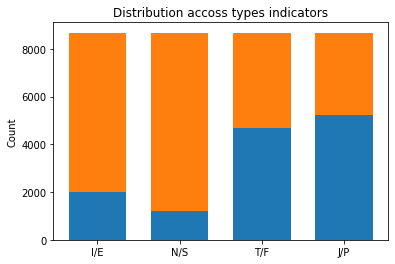

In [6]:
N = 4
but = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

In [7]:
data[['IE','NS','TF','JP']].corr()

,IE,NS,TF,JP
IE,1.000000,-0.045899,-0.069573,0.161939
NS,-0.045899,1.000000,-0.080954,0.014922
TF,-0.069573,-0.080954,1.000000,-0.004673
JP,0.161939,0.014922,-0.004673,1.000000


In [8]:
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    # transform binary vector to mbti personality
    
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

# Check ...
d = data.head(4)
list_personality_bin = np.array([translate_personality(p) for p in d.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [9]:
##### Compute list of subject with Type | list of comments 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk import word_tokenize

# We want to remove these from the psosts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
  
unique_type_list = [x.lower() for x in unique_type_list]


# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")

def pre_process_data(data, remove_stop_words=True, remove_mbti_profiles=True):

    list_personality = []
    list_posts = []
    len_data = len(data)
    i=0
    
    for row in data.iterrows():
        i+=1
        if (i % 500 == 0 or i == 1 or i == len_data):
            print("%s of %s rows" % (i, len_data))

        ##### Remove and clean comments
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
            
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")

        type_labelized = translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)

    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

In [10]:
list_posts, list_personality  = pre_process_data(data, remove_stop_words=True)

1 of 8675 rows
500 of 8675 rows
1000 of 8675 rows
1500 of 8675 rows
2000 of 8675 rows
2500 of 8675 rows
3000 of 8675 rows
3500 of 8675 rows
4000 of 8675 rows
4500 of 8675 rows
5000 of 8675 rows
5500 of 8675 rows
6000 of 8675 rows
6500 of 8675 rows
7000 of 8675 rows
7500 of 8675 rows
8000 of 8675 rows
8500 of 8675 rows
8675 of 8675 rows


In [11]:
print("Num posts and personalities: ",  list_posts.shape, list_personality.shape)
list_posts[0]
list_personality[0]

Num posts and personalities:  (8675,) (8675, 4)


array([1, 0, 0, 0])

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

# Posts to a matrix of token counts
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,  
                             max_df=0.7,
                             min_df=0.1) 

# Learn the vocabulary dictionary and return term-document matrix
print("CountVectorizer...")
X_cnt = cntizer.fit_transform(list_posts)

# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

print("Tf-idf...")
# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

CountVectorizer...
Tf-idf...


In [13]:
feature_names = list(enumerate(cntizer.get_feature_names()))
print(feature_names)
print("X: Posts in tf-idf representation \n* 1st row:\n%s" % X_tfidf)

[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'accept'), (4, 'accurate'), (5, 'across'), (6, 'act'), (7, 'action'), (8, 'actual'), (9, 'actually'), (10, 'add'), (11, 'admit'), (12, 'advice'), (13, 'afraid'), (14, 'age'), (15, 'ago'), (16, 'agree'), (17, 'ah'), (18, 'almost'), (19, 'alone'), (20, 'along'), (21, 'already'), (22, 'although'), (23, 'amazing'), (24, 'amount'), (25, 'angry'), (26, 'animal'), (27, 'annoying'), (28, 'another'), (29, 'answer'), (30, 'anxiety'), (31, 'anymore'), (32, 'anyone'), (33, 'anything'), (34, 'anyway'), (35, 'apparently'), (36, 'appreciate'), (37, 'approach'), (38, 'area'), (39, 'argument'), (40, 'around'), (41, 'art'), (42, 'ask'), (43, 'asked'), (44, 'asking'), (45, 'aspect'), (46, 'assume'), (47, 'attention'), (48, 'attracted'), (49, 'avatar'), (50, 'avoid'), (51, 'aware'), (52, 'away'), (53, 'awesome'), (54, 'awkward'), (55, 'baby'), (56, 'back'), (57, 'bad'), (58, 'based'), (59, 'basically'), (60, 'beautiful'), (61, 'become'), (62, 'bed'), (6

In [14]:
type_indicators = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) – Sensing (S)", 
                   "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) – Perceiving (P)"  ]

for l in range(len(type_indicators)):
    print(type_indicators[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) – Sensing (S)
FT: Feeling (F) - Thinking (T)
JP: Judging (J) – Perceiving (P)


In [15]:
print("MBTI 1st row: %s" % translate_back(list_personality[0,:]))
print("Y: Binarized MBTI 1st row: %s" % list_personality[0,:])

MBTI 1st row: ENFJ
Y: Binarized MBTI 1st row: [1 0 0 0]


In [16]:
# First XGBoost model for MBTI dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Posts in tf-idf representation
X = X_tfidf

# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    # Let's train type indicator individually
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 77.87%
NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) Accuracy: 86.32%
FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) Accuracy: 73.30%
JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) Accuracy: 63.73%


In [17]:
# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier()
    eval_set = [(X_test, y_test)]
    model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))
    

IE: Introversion (I) / Extroversion (E) ...
[0]	validation_0-logloss:0.61155
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.56836
[2]	validation_0-logloss:0.54345
[3]	validation_0-logloss:0.52799
[4]	validation_0-logloss:0.52029
[5]	validation_0-logloss:0.51610
[6]	validation_0-logloss:0.51333
[7]	validation_0-logloss:0.51274
[8]	validation_0-logloss:0.50887
[9]	validation_0-logloss:0.50764
[10]	validation_0-logloss:0.50605
[11]	validation_0-logloss:0.50752
[12]	validation_0-logloss:0.50883
[13]	validation_0-logloss:0.51162
[14]	validation_0-logloss:0.51154
[15]	validation_0-logloss:0.51086
[16]	validation_0-logloss:0.51100
[17]	validation_0-logloss:0.51160
[18]	validation_0-logloss:0.51178
[19]	validation_0-logloss:0.51240
[20]	validation_0-logloss:0.51275
Stopping. Best iteration:
[10]	validation_0-logloss:0.50605

* IE: Introversion (I) / Extroversion (E) Accuracy: 77.10%
NS: Intuition (N) – Sensing (S) ...
[0]	validation_0-logloss:0.5

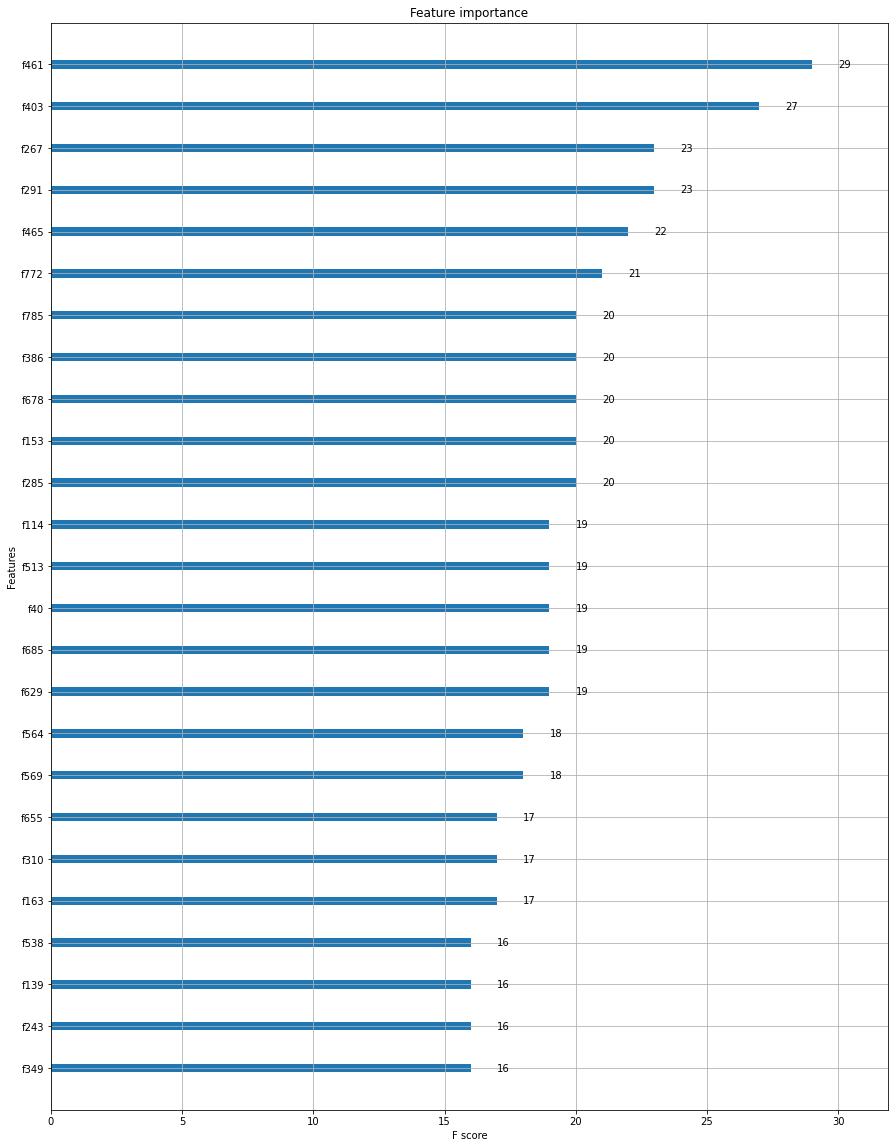

In [18]:
from xgboost import plot_importance

# Only the 1st indicator
y = list_personality[:,0]
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
ax = plot_importance(model, max_num_features=25)

fig = ax.figure
fig.set_size_inches(15, 20)

plt.show()

In [19]:
features = sorted(list(enumerate(model.feature_importances_)), key=lambda x: x[1], reverse=True)
for f in features[0:25]:
    print("%d\t%f\t%s" % (f[0],f[1],cntizer.get_feature_names()[f[0]]))
    
# Save xgb_params for late discussuin
default_get_xgb_params = model.get_xgb_params()

222	0.004595	expect
551	0.004560	quiet
122	0.004260	computer
93	0.004210	case
461	0.004159	ne
396	0.003930	listening
690	0.003837	terrible
477	0.003657	nt
438	0.003622	middle
112	0.003487	college
292	0.003386	haha
80	0.003349	boyfriend
434	0.003345	mention
291	0.003298	guy
428	0.003248	meant
249	0.003232	figure
329	0.003190	hug
337	0.003139	image
313	0.003133	hey
581	0.003129	run
719	0.003114	truth
351	0.003087	introvert
235	0.003071	family
244	0.003042	fellow
53	0.002993	awesome


In [38]:
#sample my_posts is ndarray
hp = pd.read_csv('.\data\\test\\HP_DUMBLEDORE.csv')
hp_list = hp['Sentence'].tolist()
hp_string = ''.join([str(elem) for elem in hp_list])
print(hp_string)



# The type is just a dummy so that the data prep fucntion can be reused
mydata = pd.DataFrame(data={'type': ['ENFJ'], 'posts': [hp_string]})

hp_string, dummy = pre_process_data(mydata, remove_stop_words=True)

my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

I should've known that you would be here, Professor McGonagall.I'm afraid so, professor.The good and the bad.Hagrid is bringing him.Ah, Professor, I would trust Hagrid with my life.No problems, I trust, Hagrid?Albus, do you really think it's safe, leaving him with these people?The only family he has.Exactly.He's far better off growing up away from all of that.Until he's ready.There, there, Hagrid.It's not really goodbye, after all.Good luck...Harry Potter.I have a few start-of-term notices I wish to announce.The first years, please note that the Dark Forest is strictly forbidden to all students.Also, our caretaker, Mr. Filch, has asked me to remind you that the third-floor corridor on the right hand side is out of bounds to everyone who does not wish to die a most painful death.Thank you.Let the feast begin.SILLLLLEEENNNNCEEEEE! Everyone will please, not panic. Now, Prefects will lead their houses back to the dormitories. Teachers will follow me to the dungeons.What happened down in th

In [36]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

result = []
# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])
    # print("* %s prediction: %s" % (type_indicators[l], y_pred))

IE: Introversion (I) / Extroversion (E) ...
NS: Intuition (N) – Sensing (S) ...
FT: Feeling (F) - Thinking (T) ...
JP: Judging (J) – Perceiving (P) ...


In [39]:
print("The result is: ", translate_back(result))

The result is:  INFP
